In [24]:
df_ihh  <-  read.csv(file="raw_data.csv", header=TRUE, sep=",", row.names =1)

In [26]:
df_ihh$MA[df_ihh$MA == 0] <- NA
df_ihh['log_ihh'] = log(df_ihh$IHH)
df_ihh['log_ma'] = log(df_ihh$MA)

In [27]:
library('plm')

In [28]:
df_ihh = pdata.frame(df_ihh, index = c('otrasl','year'))

In [29]:
df_ihh['ma_lag'] = lag(df_ihh$MA, 1)

In [30]:
df_lag = lag(df_ihh$MA, 1)

In [31]:
df_ihh

,year,otrasl,TR,TR10,TR50,TR100,TR10.,CR.10.,CR.50.,CR.100.,⋯,real_prices,real_gdp_change,market_type,type_1,type_2,type_3,type_4,log_ihh,log_ma,ma_lag
IT-2013,2013,IT,6.690939e+11,1.508438e+11,2.786565e+11,3.502026e+11,4.995890e+11,0.22544485,0.4164684,0.5233982,⋯,34351.5108,1289.1494,0,0,0,0,0,4.459206,10.444401,NA
IT-2014,2014,IT,7.520101e+11,1.652843e+11,3.141786e+11,3.924966e+11,5.607147e+11,0.21978999,0.4177851,0.5219299,⋯,48277.4094,408.8907,0,0,0,0,0,4.514560,10.857040,34351.5100
IT-2015,2015,IT,8.515278e+11,1.974169e+11,3.688624e+11,4.584403e+11,6.452505e+11,0.23183846,0.4331771,0.5383738,⋯,94522.4299,-1971.4729,0,0,0,0,0,4.592295,11.605874,51898.2100
IT-2016,2016,IT,9.888551e+11,2.454452e+11,4.611053e+11,5.574520e+11,7.653912e+11,0.24821145,0.4663022,0.5637347,⋯,257624.4652,497.0722,1,1,0,0,0,4.706165,12.636155,109740.5400
IT-2017,2017,IT,2.755628e+12,5.227333e+10,1.566990e+11,2.251471e+11,3.832051e+11,0.06951148,0.2083735,0.2993937,⋯,36759.1762,1216.0974,0,0,0,0,0,2.633643,10.740683,307476.8600
ДОБЫЧА-2013,2013,ДОБЫЧА,1.212809e+13,6.897735e+12,1.002198e+13,1.091798e+13,1.133200e+13,0.56874019,0.8263441,0.9002218,⋯,16702.8706,1289.1494,3,0,0,1,0,6.893536,9.723336,NA
ДОБЫЧА-2014,2014,ДОБЫЧА,1.363228e+13,7.870675e+12,1.127471e+13,1.229608e+13,1.274206e+13,0.57735556,0.8270596,0.9019827,⋯,8217.7090,408.8907,4,0,0,0,1,7.014341,9.086367,16702.8700
ДОБЫЧА-2015,2015,ДОБЫЧА,1.436711e+13,7.706976e+12,1.164553e+13,1.279458e+13,1.331185e+13,0.53643183,0.8105689,0.8905463,⋯,5716.0842,-1971.4729,3,0,0,1,0,6.736945,8.800320,8834.0300
ДОБЫЧА-2016,2016,ДОБЫЧА,1.462882e+13,7.647184e+12,1.168457e+13,1.292996e+13,1.347955e+13,0.52274772,0.7987361,0.8838686,⋯,27747.2148,497.0722,3,0,0,1,0,6.736603,10.407788,6636.3700
ДОБЫЧА-2017,2017,ДОБЫЧА,1.736623e+13,9.182911e+12,1.384570e+13,1.533134e+13,1.601985e+13,0.52877986,0.7972771,0.8828249,⋯,7018.8318,1216.0974,3,0,0,1,0,6.810065,9.084892,33116.5200


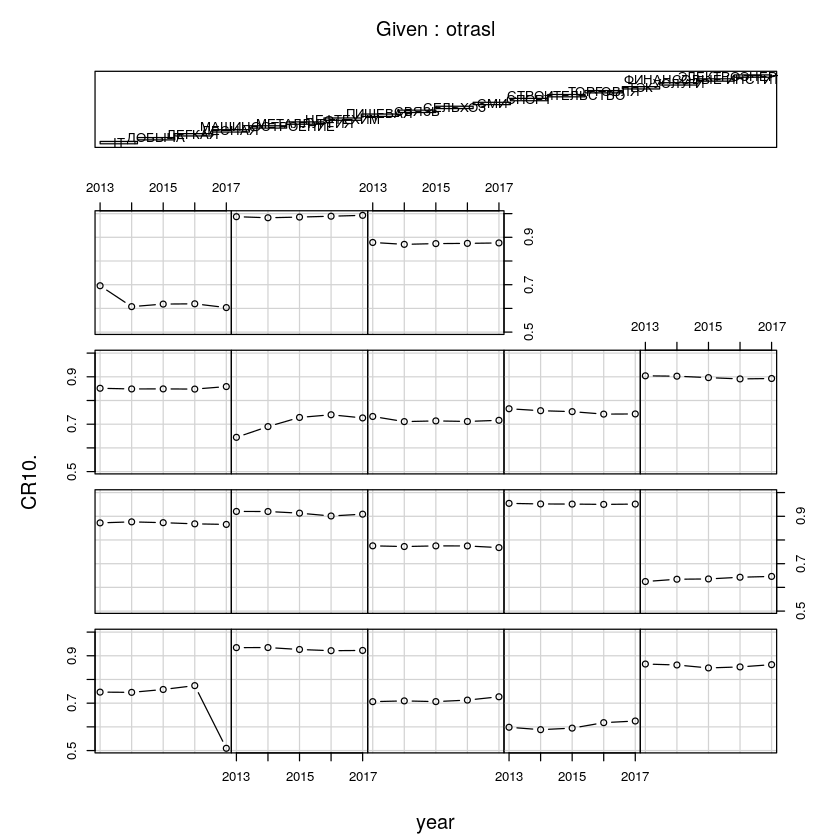

In [32]:
coplot(CR10. ~ year|otrasl, type="b", data=df_ihh)

In [33]:
library(gplots)

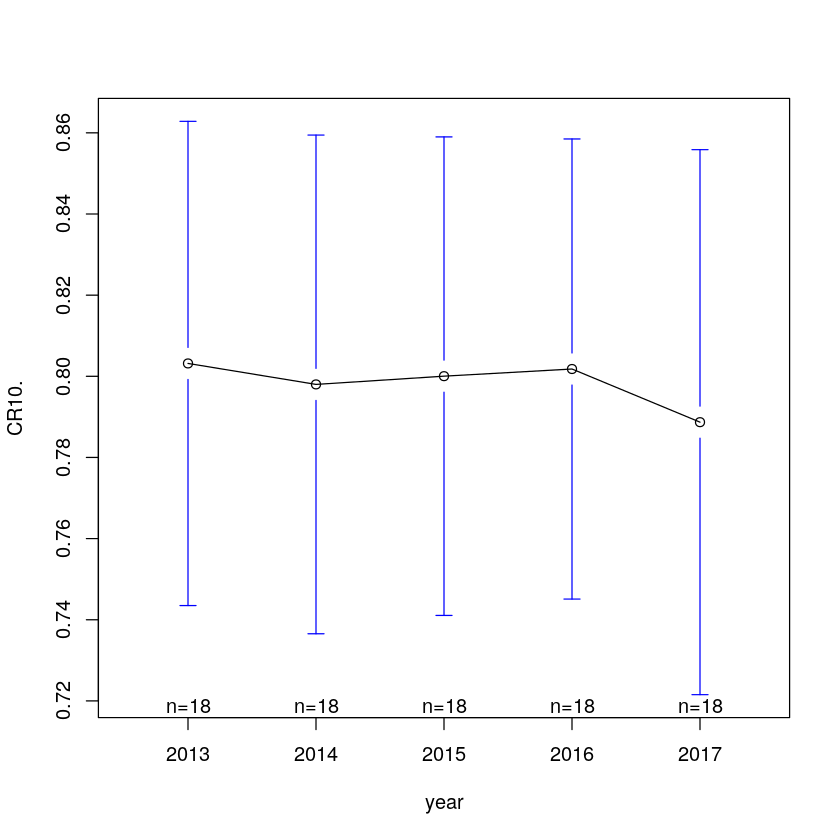

In [36]:
plotmeans(CR10. ~ year, data = df_ihh)
# plotmeans(CR10. ~ otrasl, data = df_ihh)

In [37]:
ols <-lm(CR10.~log_ma, data = df_ihh)
summary(ols)


Call:
lm(formula = CR10. ~ log_ma, data = df_ihh)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29506 -0.08192  0.04258  0.08384  0.17879 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.646958   0.076714   8.433 6.48e-13 ***
log_ma      0.014680   0.007294   2.013   0.0472 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1181 on 87 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.04449,	Adjusted R-squared:  0.03351 
F-statistic: 4.051 on 1 and 87 DF,  p-value: 0.04723


In [38]:
library(ggplot2)

Warning message:
“Removed 1 rows containing missing values (geom_point).”

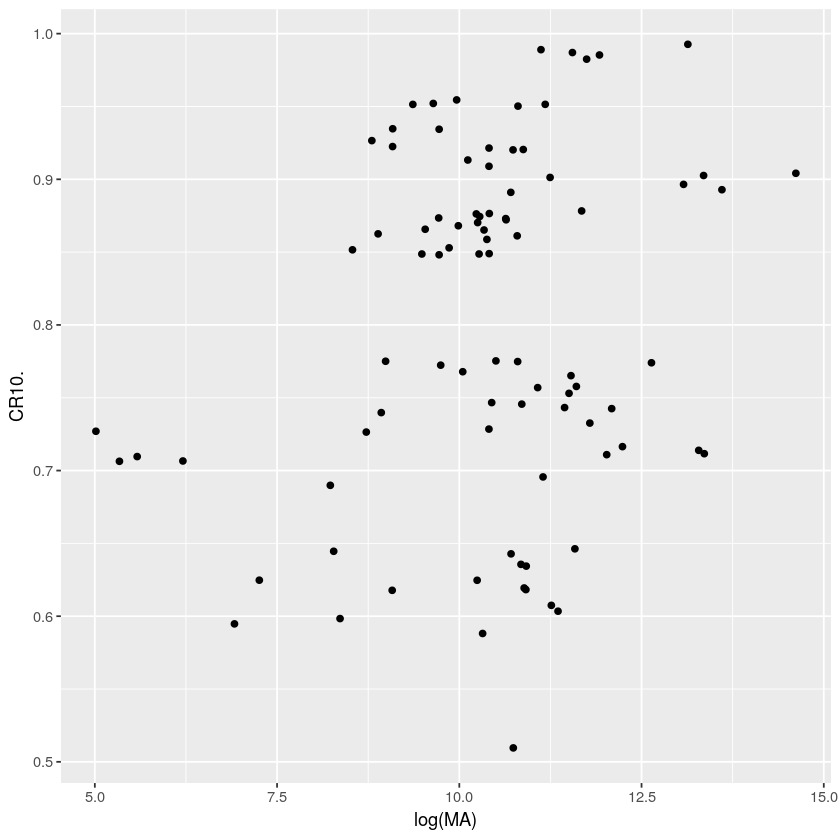

In [39]:
yhat <- ols$fitted
ggplot(df_ihh, aes(x = log(MA), y = CR10.))+
  geom_point() 
# +
#    geom_smooth(method=lm)

In [40]:
fixed.dum <-lm(CR10.~log_ma + factor(otrasl) - 1, data = df_ihh)
summary(fixed.dum)


Call:
lm(formula = CR10. ~ log_ma + factor(otrasl) - 1, data = df_ihh)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.194394 -0.005103 -0.001052  0.005833  0.066603 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
log_ma                             0.005344   0.004541   1.177    0.243    
factor(otrasl)IT                   0.646572   0.052849  12.234   <2e-16 ***
factor(otrasl)ДОБЫЧА               0.877561   0.044833  19.574   <2e-16 ***
factor(otrasl)ЛЕГКАЯ               0.682806   0.029272  23.326   <2e-16 ***
factor(otrasl)ЛЕСНАЯ               0.559930   0.040380  13.867   <2e-16 ***
factor(otrasl)МАШИНОСТРОЕНИЕ       0.805345   0.046799  17.209   <2e-16 ***
factor(otrasl)МЕТАЛЛУРГИЯ          0.816365   0.048405  16.865   <2e-16 ***
factor(otrasl)НЕФТЕХИМ             0.855761   0.050305  17.011   <2e-16 ***
factor(otrasl)ПИЩЕВАЯ              0.719563   0.047424  15.173   <2e-16 ***
factor(otrasl)СВЯЗЬ                0.89

In [41]:
library(car)  

In [43]:
# yhat <- fixed.dum$fitted
# scatterplot(yhat ~ df_ihh$log_ma | df_ihh$otrasl,  xlab ="x1", ylab ="yhat", boxplots = FALSE,smooth = FALSE)
# abline(lm(df_ihh$CR10.~df_ihh$log_ma),lwd=3, col="red")

In [44]:
fixed <- plm(CR10.~log_ma, data = df_ihh, model="within")
summary(fixed)

Oneway (individual) effect Within Model

Call:
plm(formula = CR10. ~ log_ma, data = df_ihh, model = "within")

Unbalanced Panel: n = 18, T = 4-5, N = 89

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.1943942 -0.0051032 -0.0010520  0.0058335  0.0666025 

Coefficients:
        Estimate Std. Error t-value Pr(>|t|)
log_ma 0.0053438  0.0045410  1.1768   0.2433

Total Sum of Squares:    0.064255
Residual Sum of Squares: 0.063009
R-Squared:      0.0194
Adj. R-Squared: -0.23275
F-statistic: 1.38487 on 1 and 70 DF, p-value: 0.24326

In [45]:
fixef(fixed)

IT               ДОБЫЧА               ЛЕГКАЯ 
           0.6465722            0.8775613            0.6828061 
              ЛЕСНАЯ       МАШИНОСТРОЕНИЕ          МЕТАЛЛУРГИЯ 
           0.5599299            0.8053448            0.8163653 
            НЕФТЕХИМ              ПИЩЕВАЯ                СВЯЗЬ 
           0.8557614            0.7195629            0.8974796 
             СЕЛЬХОЗ                  СМИ                СПОРТ 
           0.5787084            0.7985166            0.6582024 
       СТРОИТЕЛЬСТВО             ТОРГОВЛЯ                  ТЭК 
           0.6500774            0.6905763            0.8275688 
              УСЛУГИ ФИНАНСОВЫЕ ИНСТИТУТЫ    ЭЛЕКТРОЭНЕРГЕТИКА 
           0.5694452            0.9237397            0.8187810

In [46]:
pFtest(fixed, ols)


	F test for individual effects

data:  CR10. ~ log_ma
F = 75.142, df1 = 17, df2 = 70, p-value < 2.2e-16
alternative hypothesis: significant effects


p-value < 0.05 выбираем fe model 

In [47]:
random <- plm(CR10.~log_ma, data = df_ihh, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = CR10. ~ log_ma, data = df_ihh, model = "random")

Unbalanced Panel: n = 18, T = 4-5, N = 89

Effects:
                    var   std.dev share
idiosyncratic 0.0009001 0.0300020 0.059
individual    0.0142292 0.1192862 0.941
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8752  0.8882  0.8882  0.8876  0.8882  0.8882 

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.204891 -0.011443  0.006520  0.000037  0.014652  0.048036 

Coefficients:
             Estimate Std. Error z-value Pr(>|z|)    
(Intercept) 0.7356190  0.0532311  13.819   <2e-16 ***
log_ma      0.0060759  0.0043742   1.389   0.1648    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    0.078919
Residual Sum of Squares: 0.07768
R-Squared:      0.016305
Adj. R-Squared: 0.0049985
Chisq: 1.38742 on 1 DF, p-value: 0.23884

In [48]:
phtest(fixed, random)


	Hausman Test

data:  CR10. ~ log_ma
chisq = 0.3604, df = 1, p-value = 0.5483
alternative hypothesis: one model is inconsistent


p-value > 0.5 используем  RE модель

In [49]:
fixed.time <- plm(CR10.~log_ma + factor(year), data=df_ihh, model="within")
summary(fixed.time)



Oneway (individual) effect Within Model

Call:
plm(formula = CR10. ~ log_ma + factor(year), data = df_ihh, model = "within")

Unbalanced Panel: n = 18, T = 4-5, N = 89

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-0.18579906 -0.00641624 -0.00066098  0.00685090  0.06176810 

Coefficients:
                   Estimate Std. Error t-value Pr(>|t|)
log_ma            0.0046361  0.0046416  0.9988   0.3215
factor(year)2014 -0.0053573  0.0101322 -0.5287   0.5988
factor(year)2015 -0.0032521  0.0101311 -0.3210   0.7492
factor(year)2016 -0.0018668  0.0103397 -0.1805   0.8573
factor(year)2017 -0.0138196  0.0101515 -1.3613   0.1780

Total Sum of Squares:    0.064255
Residual Sum of Squares: 0.060959
R-Squared:      0.051293
Adj. R-Squared: -0.26494
F-statistic: 0.713674 on 5 and 66 DF, p-value: 0.61535

In [50]:
pFtest(fixed.time, fixed)


	F test for individual effects

data:  CR10. ~ log_ma + factor(year)
F = 0.55469, df1 = 4, df2 = 66, p-value = 0.6963
alternative hypothesis: significant effects


In [51]:
plmtest(fixed, c("time"), type=("bp"))


	Lagrange Multiplier Test - time effects (Breusch-Pagan) for unbalanced
	panels

data:  CR10. ~ log_ma
chisq = 2.5243, df = 1, p-value = 0.1121
alternative hypothesis: significant effects


нет фиксированных временных эффектов

In [52]:
pool <- plm(CR10.~log_ma, data = df_ihh, model="pooling")
summary(pool)

Pooling Model

Call:
plm(formula = CR10. ~ log_ma, data = df_ihh, model = "pooling")

Unbalanced Panel: n = 18, T = 4-5, N = 89

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-0.295062 -0.081917  0.042580  0.083835  0.178786 

Coefficients:
             Estimate Std. Error t-value  Pr(>|t|)    
(Intercept) 0.6469584  0.0767142  8.4334 6.481e-13 ***
log_ma      0.0146805  0.0072937  2.0128   0.04723 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    1.2693
Residual Sum of Squares: 1.2128
R-Squared:      0.044494
Adj. R-Squared: 0.033511
F-statistic: 4.05126 on 1 and 87 DF, p-value: 0.04723

In [53]:
plmtest(pool, type=c("bp"))


	Lagrange Multiplier Test - (Breusch-Pagan) for unbalanced panels

data:  CR10. ~ log_ma
chisq = 156.01, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects


p-value < 2.2e-16  используем re модель

In [54]:
pcdtest(fixed, test = c("lm"))


	Breusch-Pagan LM test for cross-sectional dependence in panels

data:  CR10. ~ log_ma
chisq = 218.63, df = 153, p-value = 0.0003954
alternative hypothesis: cross-sectional dependence


In [55]:
pcdtest(fixed, test = c("cd"))


	Pesaran CD test for cross-sectional dependence in panels

data:  CR10. ~ log_ma
z = -1.1228, p-value = 0.2615
alternative hypothesis: cross-sectional dependence


p-value > 0.05 нет кросс-секциональной зависимости

In [56]:
pbgtest(fixed)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  CR10. ~ log_ma
chisq = 7.4692, df = 4, p-value = 0.1131
alternative hypothesis: serial correlation in idiosyncratic errors


Есть серийная корреляция, однако на коротких временных рядах - это не является проблемой

In [57]:
library(tseries)  

In [59]:
adf.test(df_ihh$CR10., k=2)

Warning message in adf.test(df_ihh$CR10., k = 2):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  df_ihh$CR10.
Dickey-Fuller = -4.1456, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


p-value < 0.05 ряды не имеют единичного корня

In [61]:
library(lmtest)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [62]:
bptest(CR10.~log_ma, data = df_ihh, studentize=F)


	Breusch-Pagan test

data:  CR10. ~ log_ma
BP = 0.45606, df = 1, p-value = 0.4995


НЕТ гетероскдастичности

In [65]:
coeftest(random) 


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.7356190  0.0532311  13.819   <2e-16 ***
log_ma      0.0060759  0.0043742   1.389   0.1684    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [66]:
coeftest(random, vcovHC) 


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.7356190  0.0498785 14.7482   <2e-16 ***
log_ma      0.0060759  0.0037699  1.6117   0.1106    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [67]:
coeftest(random, vcovHC(random, type = "HC3")) 


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.7356190  0.0512604  14.351   <2e-16 ***
log_ma      0.0060759  0.0039250   1.548   0.1252    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


HC3 – Recommended for small samples. HC3 gives less weight to influential observations.

In [69]:
random <- plm(CR10.~log_ma+log(ma_lag), data = df_ihh, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = CR10. ~ log_ma + log(ma_lag), data = df_ihh, model = "random")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Effects:
                    var   std.dev share
idiosyncratic 0.0009592 0.0309712 0.059
individual    0.0151631 0.1231385 0.941
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8249  0.8752  0.8752  0.8738  0.8752  0.8752 

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.189288 -0.013043  0.004822  0.000173  0.017796  0.058402 

Coefficients:
              Estimate Std. Error z-value Pr(>|z|)    
(Intercept)  0.7842139  0.0873055  8.9824   <2e-16 ***
log_ma       0.0061580  0.0052755  1.1673   0.2431    
log(ma_lag) -0.0049309  0.0051086 -0.9652   0.3344    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    0.066609
Residual Sum of Squares: 0.063391
R-Squared:      0.052262
Adj. R-Squared: 0.023972
C

In [70]:
coeftest(random, vcovHC) 


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7842139  0.0554613 14.1398   <2e-16 ***
log_ma       0.0061580  0.0048433  1.2715   0.2080    
log(ma_lag) -0.0049309  0.0077561 -0.6358   0.5271    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [71]:
coeftest(random, vcovHC(random, type = "HC3")) 


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7842139  0.0595526 13.1684   <2e-16 ***
log_ma       0.0061580  0.0052119  1.1815   0.2416    
log(ma_lag) -0.0049309  0.0083385 -0.5913   0.5563    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [73]:
random <- plm(CR10.~log_ma+log(ma_lag)+real_prices+real_gdp_change, data = df_ihh, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = CR10. ~ log_ma + log(ma_lag) + real_prices + real_gdp_change, 
    data = df_ihh, model = "random")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Effects:
                    var   std.dev share
idiosyncratic 0.0009793 0.0312933 0.054
individual    0.0171318 0.1308884 0.946
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8333  0.8813  0.8813  0.8799  0.8813  0.8813 

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.184923 -0.011715  0.004519  0.000185  0.016997  0.058961 

Coefficients:
                   Estimate  Std. Error z-value Pr(>|z|)    
(Intercept)      8.0733e-01  9.7832e-02  8.2523   <2e-16 ***
log_ma           3.8509e-03  6.8147e-03  0.5651   0.5720    
log(ma_lag)     -5.0845e-03  5.1258e-03 -0.9919   0.3212    
real_prices      2.8258e-08  5.6922e-08  0.4964   0.6196    
real_gdp_change -2.4757e-06  3.0528e-06 -0.8109   0.4174    
---


In [74]:
coeftest(random, vcovHC) 


t test of coefficients:

                   Estimate  Std. Error t value Pr(>|t|)    
(Intercept)      8.0733e-01  7.0626e-02 11.4311   <2e-16 ***
log_ma           3.8509e-03  4.0525e-03  0.9502   0.3455    
log(ma_lag)     -5.0845e-03  7.6053e-03 -0.6685   0.5062    
real_prices      2.8258e-08  3.9861e-08  0.7089   0.4809    
real_gdp_change -2.4757e-06  2.6135e-06 -0.9473   0.3470    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [75]:
coeftest(random, vcovHC(random, type = "HC3")) 


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      8.0733e-01  7.7595e-02 10.4045 1.798e-15 ***
log_ma           3.8509e-03  4.4195e-03  0.8713    0.3868    
log(ma_lag)     -5.0845e-03  8.3723e-03 -0.6073    0.5458    
real_prices      2.8258e-08  4.6743e-08  0.6045    0.5476    
real_gdp_change -2.4757e-06  2.8477e-06 -0.8694    0.3878    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [76]:
colnames(df_ihh)

[1] "year"            "otrasl"          "TR"              "TR10"           
 [5] "TR50"            "TR100"           "TR10."           "CR.10."         
 [9] "CR.50."          "CR.100."         "CR10."           "IHH"            
[13] "MA"              "real_prices"     "real_gdp_change" "market_type"    
[17] "type_1"          "type_2"          "type_3"          "type_4"         
[21] "log_ihh"         "log_ma"          "ma_lag"

In [77]:
random <- plm(CR10.~log_ma+log(ma_lag)+real_prices+real_gdp_change+market_type, data = df_ihh, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = CR10. ~ log_ma + log(ma_lag) + real_prices + real_gdp_change + 
    market_type, data = df_ihh, model = "random")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Effects:
                    var   std.dev share
idiosyncratic 0.0009384 0.0306334 0.156
individual    0.0050765 0.0712497 0.844
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7091  0.7898  0.7898  0.7875  0.7898  0.7898 

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.166370 -0.011371  0.004927  0.000157  0.015578  0.058156 

Coefficients:
                   Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)      6.7496e-01  8.5907e-02  7.8569 3.938e-15 ***
log_ma           6.9654e-03  6.4558e-03  1.0789    0.2806    
log(ma_lag)     -3.2989e-03  4.8413e-03 -0.6814    0.4956    
real_prices     -4.7664e-09  5.7157e-08 -0.0834    0.9335    
real_gdp_change -4.3787e-06  3.1626e-06 -1.384

In [78]:
coeftest(random, vcovHC) 


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      6.7496e-01  6.6915e-02 10.0868 7.497e-15 ***
log_ma           6.9654e-03  3.5000e-03  1.9901   0.05085 .  
log(ma_lag)     -3.2989e-03  7.3676e-03 -0.4478   0.65584    
real_prices     -4.7664e-09  2.3120e-08 -0.2062   0.83732    
real_gdp_change -4.3787e-06  2.9941e-06 -1.4624   0.14851    
market_type      5.5755e-02  1.1083e-02  5.0308 4.215e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [79]:
coeftest(random, vcovHC(random, type = "HC3")) 


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      6.7496e-01  7.4697e-02  9.0360 4.894e-13 ***
log_ma           6.9654e-03  3.7246e-03  1.8701   0.06604 .  
log(ma_lag)     -3.2989e-03  8.2877e-03 -0.3980   0.69192    
real_prices     -4.7664e-09  2.6283e-08 -0.1813   0.85667    
real_gdp_change -4.3787e-06  3.3950e-06 -1.2898   0.20177    
market_type      5.5755e-02  1.2523e-02  4.4520 3.480e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [80]:
random <- plm(CR10.~log_ma+log(ma_lag)+log(real_prices)+real_gdp_change+market_type, data = df_ihh, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = CR10. ~ log_ma + log(ma_lag) + log(real_prices) + 
    real_gdp_change + market_type, data = df_ihh, model = "random")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Effects:
                    var   std.dev share
idiosyncratic 0.0009341 0.0305628 0.142
individual    0.0056321 0.0750470 0.858
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7233  0.8005  0.8005  0.7983  0.8005  0.8005 

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.164724 -0.012540  0.005354  0.000157  0.015096  0.057698 

Coefficients:
                    Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)       6.8013e-01  7.6916e-02  8.8426 < 2.2e-16 ***
log_ma            5.5824e-04  1.0334e-02  0.0540    0.9569    
log(ma_lag)      -3.6497e-03  4.8136e-03 -0.7582    0.4483    
log(real_prices)  6.4359e-03  9.8738e-03  0.6518    0.5145    
real_gdp_change  -4.7155e-06  3.1607

In [81]:
coeftest(random, vcovHC) 


t test of coefficients:

                    Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)       6.8013e-01  6.1909e-02 10.9860 2.278e-16 ***
log_ma            5.5824e-04  2.9251e-03  0.1908    0.8493    
log(ma_lag)      -3.6497e-03  7.4338e-03 -0.4910    0.6251    
log(real_prices)  6.4359e-03  5.2911e-03  1.2164    0.2283    
real_gdp_change  -4.7155e-06  3.2429e-06 -1.4541    0.1508    
market_type       5.4876e-02  1.1378e-02  4.8230 9.103e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [82]:
coeftest(random, vcovHC(random, type = "HC3")) 


t test of coefficients:

                    Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)       6.8013e-01  7.2840e-02  9.3374 1.463e-13 ***
log_ma            5.5824e-04  7.5644e-03  0.0738    0.9414    
log(ma_lag)      -3.6497e-03  8.5648e-03 -0.4261    0.6714    
log(real_prices)  6.4359e-03  8.5803e-03  0.7501    0.4560    
real_gdp_change  -4.7155e-06  3.6762e-06 -1.2827    0.2042    
market_type       5.4876e-02  1.2972e-02  4.2304 7.581e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [83]:
colnames(df_ihh)

[1] "year"            "otrasl"          "TR"              "TR10"           
 [5] "TR50"            "TR100"           "TR10."           "CR.10."         
 [9] "CR.50."          "CR.100."         "CR10."           "IHH"            
[13] "MA"              "real_prices"     "real_gdp_change" "market_type"    
[17] "type_1"          "type_2"          "type_3"          "type_4"         
[21] "log_ihh"         "log_ma"          "ma_lag"

In [84]:
random <- plm(CR10.~log_ma+log(ma_lag)+real_prices+real_gdp_change+type_1+type_2+type_3+type_4, data = df_ihh, model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = CR10. ~ log_ma + log(ma_lag) + real_prices + real_gdp_change + 
    type_1 + type_2 + type_3 + type_4, data = df_ihh, model = "random")

Unbalanced Panel: n = 18, T = 2-4, N = 70

Effects:
                    var   std.dev share
idiosyncratic 0.0009596 0.0309767  0.13
individual    0.0064444 0.0802770  0.87
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7368  0.8106  0.8106  0.8084  0.8106  0.8106 

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.163745 -0.010266  0.002392  0.000115  0.013925  0.060099 

Coefficients:
                   Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)      6.8214e-01  8.7893e-02  7.7610 8.427e-15 ***
log_ma           5.4749e-03  6.4632e-03  0.8471 0.3969494    
log(ma_lag)     -3.9162e-03  4.8437e-03 -0.8085 0.4187953    
real_prices      4.5994e-09  5.6597e-08  0.0813 0.9352306    
real_gdp_change -3.8800e

In [85]:
coeftest(random, vcovHC) 


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      6.8214e-01  6.8372e-02  9.9769 1.948e-14 ***
log_ma           5.4749e-03  3.5855e-03  1.5270 0.1319380    
log(ma_lag)     -3.9162e-03  7.2492e-03 -0.5402 0.5910122    
real_prices      4.5994e-09  2.4617e-08  0.1868 0.8524061    
real_gdp_change -3.8800e-06  3.1441e-06 -1.2341 0.2219137    
type_1           5.1432e-02  2.5992e-02  1.9787 0.0523647 .  
type_2           1.6826e-01  4.3541e-02  3.8643 0.0002725 ***
type_3           1.9208e-01  3.9477e-02  4.8657 8.394e-06 ***
type_4           2.2612e-01  3.9300e-02  5.7538 3.017e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [86]:
coeftest(random, vcovHC(random, type = "HC3")) 


t test of coefficients:

                   Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)      6.8214e-01  7.6951e-02  8.8646 1.454e-12 ***
log_ma           5.4749e-03  4.0430e-03  1.3541 0.1806859    
log(ma_lag)     -3.9162e-03  8.2230e-03 -0.4762 0.6356009    
real_prices      4.5994e-09  2.9058e-08  0.1583 0.8747578    
real_gdp_change -3.8800e-06  3.6640e-06 -1.0590 0.2937941    
type_1           5.1432e-02  3.3508e-02  1.5349 0.1299680    
type_2           1.6826e-01  5.1030e-02  3.2972 0.0016317 ** 
type_3           1.9208e-01  4.9426e-02  3.8863 0.0002535 ***
type_4           2.2612e-01  4.9017e-02  4.6132 2.084e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Кратко: 

a = '4'
raw.loc[raw[raw.IHH>=1000].index, 'market_type'] =   a 

a = '3'
raw.loc[raw[(raw.IHH<1000) &  (raw.IHH>=400)].index, 'market_type'] =   a 

a = '2'
raw.loc[raw[(raw.IHH<400) &  (raw.IHH>=200)].index, 'market_type'] =   a 

a = '1'
raw.loc[raw[(raw.IHH<200) &  (raw.IHH>=100)].index, 'market_type'] =   a 

a = '0'
raw.loc[raw[(raw.IHH<100)].index, 'market_type'] =   a 

- Для анализа была выбрана RE модель
- Перемнна market_type - пять значений - и соответсвенно 4 дамми для модели
    - IHH>=1000
    - (IHH<1000) &  (IHH>=400)
    - (IHH<400) &  (IHH>=200)
    - (IHH<200) &  (IHH>=100)
    - IHH<100
- Из-за наличия гетероскедастичности необходимо использовать устойчивые к гетероскедастичности оценки ковариационной матрицы
- Если мы не применяем устойчивые оценки, для некоторых из моделей коэффициент при MA значимый, инчаче значимым остается только Intercept  и market_type (или дамми для типа рынка)
- IHH ни от цены сделки, ни от логарифма цены, ни от изменения реального ВВП 

В качестве альтернативы можно попрбоватать проверить завсимость логарифма IHH от логарифа MA (расчеты в следующем файле):